In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import cvxpy

import time
import numpy as np
import scipy as sci
import scipy.io as sio
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras


from numpy.random import seed
seed(100)


import matplotlib.pyplot as plt
from IPython.display import clear_output

(CVXPY) Jun 13 10:17:21 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 13 10:17:21 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
raw=pd.read_csv("/content/drive/MyDrive/Implied_Volatility_Data_vFinal (1).csv")

In [ ]:
raw.head()

,Date,SPX Return,Time to Maturity in Year,Delta,Implied Volatility Change
0,20140630,0.006678,0.184,0.745927,0.008462
1,20140630,0.006678,2.252,0.286911,0.002024
2,20140630,0.006678,0.124,0.902941,0.019707
3,20140630,0.006678,2.144,0.910926,0.006424
4,20140630,0.006678,1.412,0.885760,0.005673


In [ ]:
raw['x1'] = raw['SPX Return']
raw['x2'] = raw['Time to Maturity in Year']
raw['x3'] = raw['Delta']


y = raw['Implied Volatility Change']
X = raw[['x1', 'x2', 'x3',]]

In [ ]:
# Divide data into training set and test set(note that random seed is set)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
# Scale features based on Z-Score
scaler = StandardScaler()
scaler.fit(X_train)


X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
from piml.models import ReluDNNRegressor

model = ReluDNNRegressor(hidden_layer_sizes=(20, 20, 20), l1_reg=0.0002, learning_rate=0.001)


In [ ]:
from piml import Experiment
exp = Experiment()
exp.data_loader(data=pd.concat([X, y], axis=1))


,x1,x2,x3,Implied Volatility Change
0,0.006678,0.184,0.745927,0.008462
1,0.006678,2.252,0.286911,0.002024
2,0.006678,0.124,0.902941,0.019707
3,0.006678,2.144,0.910926,0.006424
4,0.006678,1.412,0.885760,0.005673
...,...,...,...,...
125695,0.003823,0.228,0.265052,-0.000778
125696,0.003823,0.144,0.943591,0.016969
125697,0.003823,0.060,0.148294,-0.001713
125698,0.003823,0.340,0.917499,0.006153


In [ ]:
exp.data_prepare()


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
exp.model_train(model=model, name="ReLUDNN")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
exp.model_diagnose(model="ReLUDNN", show="accuracy_table")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,MSE,MAE,R2
,,,
Train,0.0006,0.0145,0.0217
Test,0.0006,0.0144,0.0214
Gap,0.0000,-0.0001,-0.0002


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

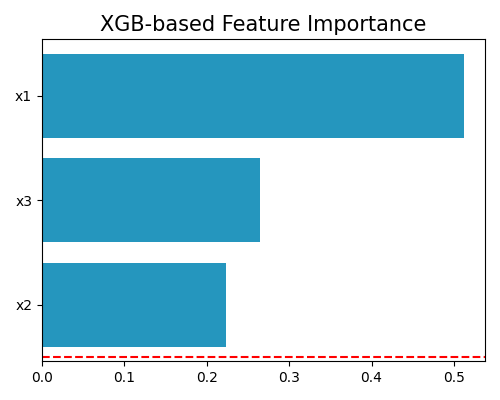

In [ ]:
exp.feature_select(method="pfi", threshold=0.95, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

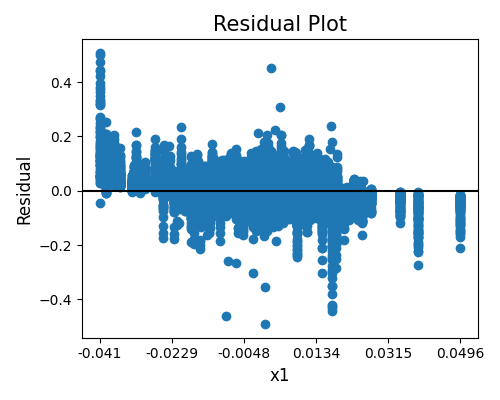

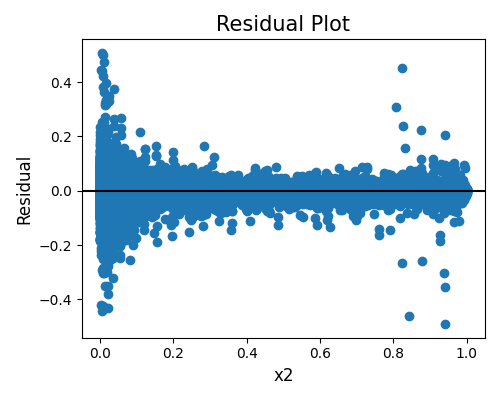

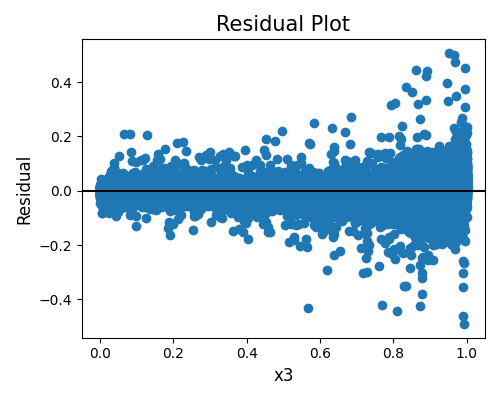

In [ ]:
exp.model_diagnose(model="ReLUDNN", show="accuracy_residual", show_feature="x1",
                   use_test=False, original_scale=True, figsize=(5, 4))
exp.model_diagnose(model="ReLUDNN", show="accuracy_residual", show_feature="x2",
                   use_test=False, figsize=(5, 4))
exp.model_diagnose(model="ReLUDNN", show="accuracy_residual", show_feature="x3",
                   use_test=False, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

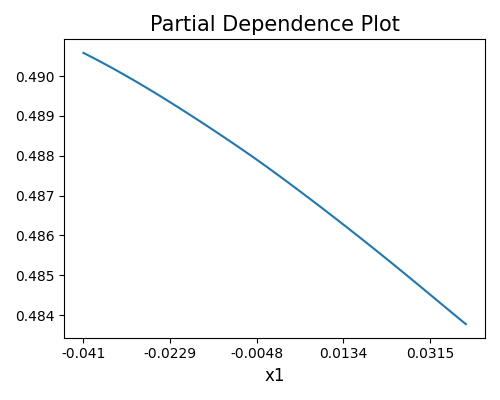

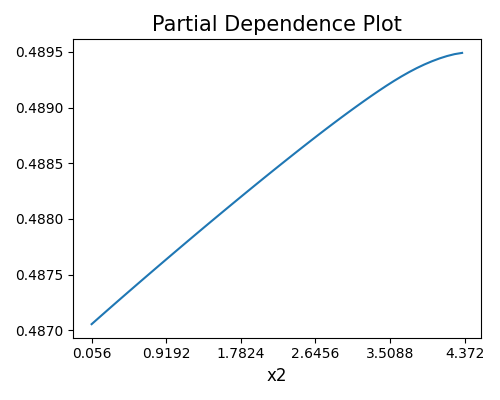

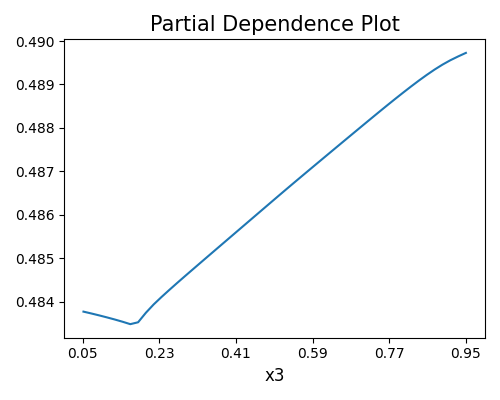

In [ ]:
exp.model_explain(model="ReLUDNN", show="pdp", uni_feature="x1",
                  grid_size=50, original_scale=True, figsize=(5, 4))
exp.model_explain(model="ReLUDNN", show="pdp", uni_feature="x2",
                  grid_size=50, original_scale=True, figsize=(5, 4))
exp.model_explain(model="ReLUDNN", show="pdp", uni_feature="x3",
                  grid_size=50, original_scale=True, figsize=(5, 4))

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_scaled_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Mean Squared Error: 0.24252938309178657


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

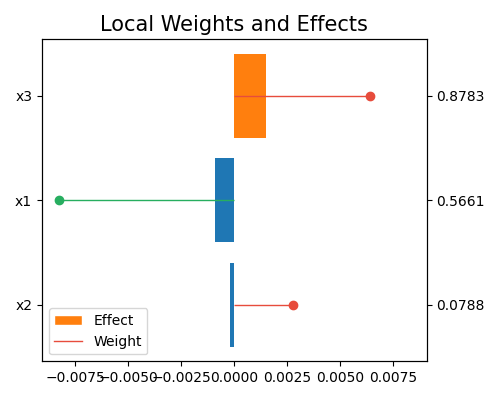

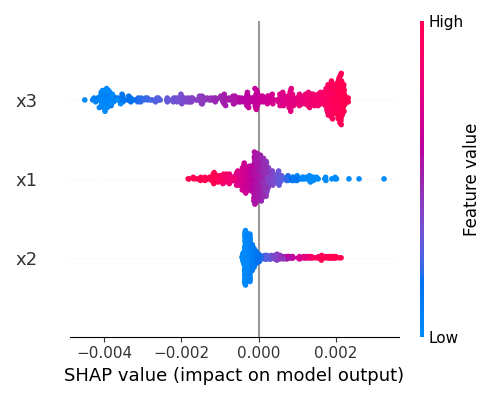

In [ ]:
exp.model_explain(model="ReLUDNN", show="lime", n_repeats=10, figsize=(5, 4))
exp.model_explain(model="ReLUDNN", show="shap_summary", n_repeats=10, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


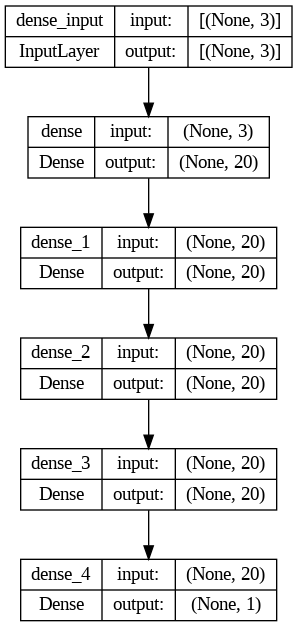

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Create a model
model = Sequential([
    Dense(20, activation='relu', input_shape=(3,)),  # Input layer with 3 inputs
    Dense(20, activation='relu'),                    # Hidden layer 1
    Dense(20, activation='relu'),                    # Hidden layer 2
    Dense(20, activation='relu'),                    # Hidden layer 3
    Dense(1, activation='linear')                    # Output layer for regression
])

# Summarize the model
model.summary()

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

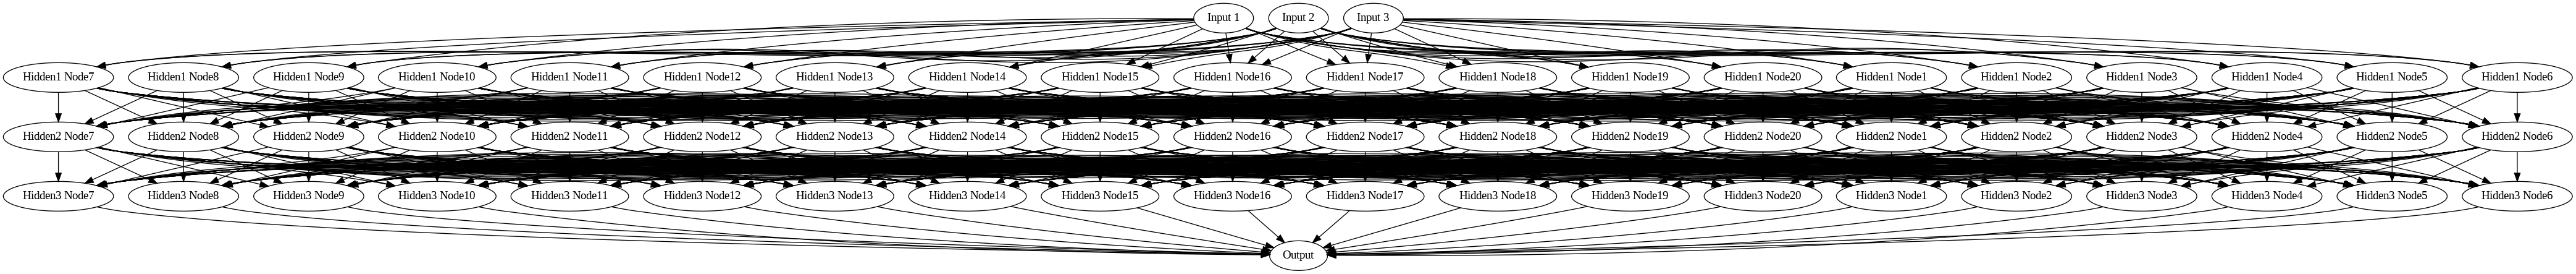

In [ ]:
from graphviz import Digraph


dot = Digraph()


for i in range(3):
    dot.node(f'input_{i}', f'Input {i+1}')


for layer in range(3):
    for node in range(20):
        dot.node(f'hidden{layer}_{node}', f'Hidden{layer+1} Node{node+1}')


dot.node('output', 'Output')


for i in range(3):
    for node in range(20):
        dot.edge(f'input_{i}', f'hidden0_{node}')


for layer in range(2):
    for node in range(20):
        for next_node in range(20):
            dot.edge(f'hidden{layer}_{node}', f'hidden{layer+1}_{next_node}')

for node in range(20):
    dot.edge(f'hidden2_{node}', 'output')


dot.render('network_diagram', format='png', cleanup=True)


from IPython.display import Image
Image(filename='network_diagram.png')
